## Symplectic Euler Integrator

In [1]:
def classicInt(z,f1,f2,h):
  ## classical symplectic Euler scheme
    dim = int(len(z)/2)
    q=z[:dim]
    p=z[dim:]
    fstage = lambda stg: h * f1(np.block([q + stg, p]))

    stageold=np.zeros(dim) 
    stage = fstage(stageold) +0.
    # Iter = 0

    # while (np.amax(abs(stage - stageold)) > 1e-10 and Iter<400):
    #   stageold = stage+0.
    #   stage = fstage(stage)+0.
    #   Iter = Iter+1
    q = q+stage
    p = p + h*f2(np.block([q,p]))
    return np.block([q,p])

def classicTrajectory(z,f1,f2,h,N=10,n_h=1):
  ## trajectory computed with classicInt
  h_gen = h/n_h
  z = z.reshape(1,-1)[0]
  trj = np.zeros((len(z),N+1))
  trj[:,0] = z.copy()

  for i in range(0,N):
    for j in range(0,int(n_h)):
      trj[:,i+1] = classicInt(trj[:,i].copy(),f1,f2,h_gen)
  return trj[:, :-1], trj[:, 1:]


## Stormer Verlet Integrator

In [2]:
def iterator(fstage,dim,maxiters):
  stageold=np.zeros(dim) 
  stage = fstage(stageold) +0.
  Iter = 0
  while (np.amax(abs(stage - stageold)) > 1e-10 and Iter<maxiters):
    stageold = stage+0.
    stage = fstage(stage)+0.
    Iter = Iter+1
  return stage

def StormerInt(z,f1,f2,h,maxiters):
	## classical symplectic Euler scheme
    dim = int(len(z)/2)
    x=z[:dim]
    y=z[dim:]
    ystage = lambda stg: h/2 * f2(np.block([x, y + stg]))
    stage=iterator(ystage,dim,maxiters)
    y=y+stage

    xstage = lambda stg: h/2 * (f1(np.block([x, y]))+f1(np.block([x+stg, y])))
    stage=iterator(xstage,dim,maxiters)
    x=x+stage
    y=y+h/2*f2(np.block([x, y]))
    return np.block([x,y])

def StormerTrajectory(z,f1,f2,h,N=10,n_h=1,maxiters=100):
	## trajectory computed with classicInt
  h_gen = h/n_h
  z = z.reshape(1,-1)[0]
  trj = np.zeros((len(z),N+1))
  trj[:,0] = z.copy()

  for i in range(0,N):
    for j in range(0,int(n_h)):
      trj[:,i+1] = StormerInt(trj[:,i].copy(),f1,f2,h_gen,maxiters)
  return trj[:, :-1], trj[:, 1:]



## Fourth order symplectic integrator

In [3]:
def fourth_order(z, f1, f2, h, eps=0.1):
    dim = int(len(z)/2)   
    kq = z[:dim]
    kp = z[dim:]
    c = np.array([0.5/(2.-2.**(1./3.)),
         (0.5-2.**(-2./3.))/(2.-2.**(1./3.)),
         (0.5-2.**(-2./3.))/(2.-2.**(1./3.)),
         0.5/(2.-2.**(1./3.))])
    d = np.array([1./(2.-2.**(1./3.)),
         -2.**(1./3.)/(2.-2.**(1./3.)),
         1./(2.-2.**(1./3.)),0.])
    for i_step in range(int(1)):
        for j in range(4):
            tp = kp
            tq = kq + c[j] * f1(z) * h
            kp = tp + d[j] * f2(z) * h
            kq = tq
    return np.block([kq, kp])


def FourthOrder(z,f1,f2,h,N=10,n_h=1,maxiters=100):
	## trajectory computed with classicInt
  h_gen = h/n_h
  z = z.reshape(1,-1)[0]
  trj = np.zeros((len(z),N+1))
  trj[:,0] = z.copy()

  for i in range(0,N):
    for j in range(0,int(n_h)):
      trj[:,i+1] = fourth_order(trj[:,i].copy(),f1,f2,h_gen,maxiters)
  return trj[:, :-1], trj[:, 1:]

3-particle toda-lattice [1](https://www.sciencedirect.com/science/article/abs/pii/0167278987900832)

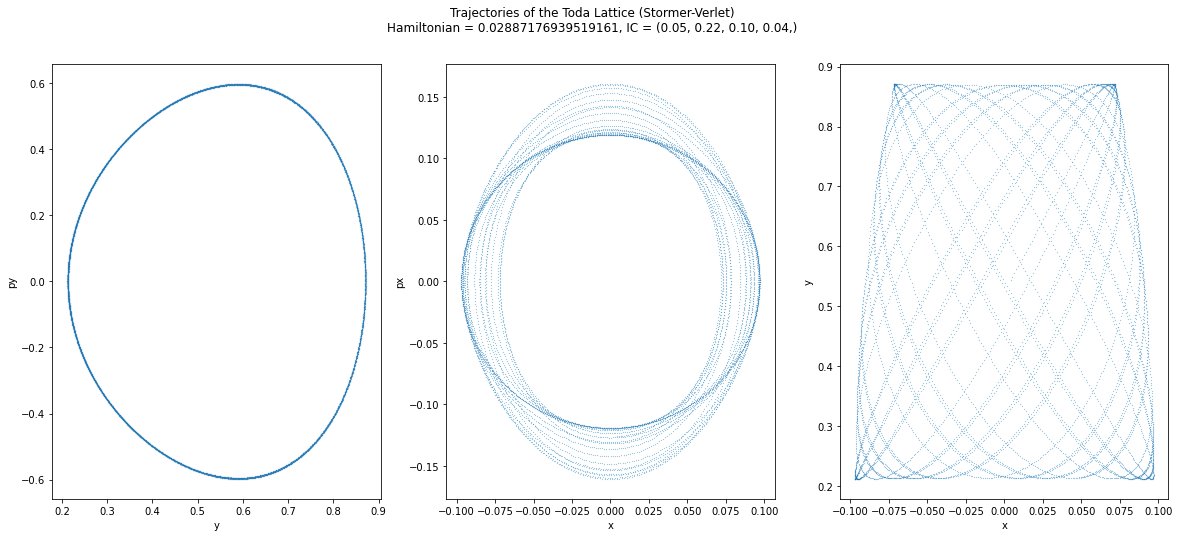

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

H = lambda x: 1/2*(x[2]**2 + x[3]**2) +1/2*(x[0]**2+x[1]**2)+1*(x[0]**2 *x[1] -(x[1]**3)/3)+(x[0]**4)/2+(x[0]**2)*(x[1]**2) +(x[1]**4)/2 + x[1]*x[0]**4 +(2/3)*(x[0]**2)*(x[1]**3)-(x[1]**5)/3
f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x: np.asarray([-x[0]-2*1*x[0]*x[1]-2*x[0]**3-(x[1]**2)*2*x[0]+4*x[1]*x[0]**3+(4/3)*x[0]*x[1]**3, 
                           -x[1]-1*(x[0]*x[0]-x[1]*x[1])-2*x[1]**3-(x[1]**2)*2*x[1]+x[0]**4+2*x[1]**2*x[0]**2+(5/3)**x[1]**4])

np.random.seed(0)
inp = np.random.rand(4)-0.5
# fig, ax = plt.subplots(1,3,figsize = (20,8))
# soln = FourthOrder(inp,f1,f2,0.0001,N=800000,n_h=1)
# ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
# ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
# ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
# fig.suptitle("Trajectories of the Kepler System (4-th order symplectic integrator)")
# ax[0].set_xlabel("y")
# ax[0].set_ylabel("py")
# ax[1].set_xlabel("x")
# ax[1].set_ylabel("px")
# ax[2].set_xlabel("x")
# ax[2].set_ylabel("y")
# plt.show()

fig, ax = plt.subplots(1,3,figsize = (20,8))
soln = StormerTrajectory(inp,f1,f2,0.01,N=8000,n_h=1)
ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
fig.suptitle("Trajectories of the Toda Lattice (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3], ))
ax[0].set_xlabel("y")
ax[0].set_ylabel("py")
ax[1].set_xlabel("x")
ax[1].set_ylabel("px")
ax[2].set_xlabel("x")
ax[2].set_ylabel("y")
plt.show()

# fig, ax = plt.subplots(1,3,figsize = (20,8))
# soln = classicTrajectory(inp,f1,f2,0.0001,N=800000,n_h=1)
# ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
# ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
# ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
# fig.suptitle("Trajectories of the Kepler System (Symplectic Euler)")
# ax[0].set_xlabel("y")
# ax[0].set_ylabel("py")
# ax[1].set_xlabel("x")
# ax[1].set_ylabel("px")
# ax[2].set_xlabel("x")
# ax[2].set_ylabel("y")
# plt.show()

The following plots show a slow escape to infinity for energy above 1/6

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

H = lambda x: 1/2*(x[2]**2 + x[3]**2) +1/2*(x[0]**2+x[1]**2)+1*(x[0]**2 *x[1] -(x[1]**3)/3)+(x[0]**4)/2+(x[0]**2)*(x[1]**2) +(x[1]**4)/2 + x[1]*x[0]**4 +(2/3)*(x[0]**2)*(x[1]**3)-(x[1]**5)/3
f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x: np.asarray([-x[0]-2*1*x[0]*x[1]-2*x[0]**3-(x[1]**2)*2*x[0]+4*x[1]*x[0]**3+(4/3)*x[0]*x[1]**3, 
                           -x[1]-1*(x[0]*x[0]-x[1]*x[1])-2*x[1]**3-(x[1]**2)*2*x[1]+x[0]**4+2*x[1]**2*x[0]**2+(5/3)**x[1]**4])
np.random.seed(0)

for i in tqdm(range(50)):
  inp = np.random.rand(4)-0.5
  fig, ax = plt.subplots(1,3,figsize = (20,8))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=8000,n_h=1)
  ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
  fig.suptitle("Trajectories of the Toda Lattice (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3],))
  ax[0].set_xlabel("y")
  ax[0].set_ylabel("py")
  ax[1].set_xlabel("x")
  ax[1].set_ylabel("px")
  ax[2].set_xlabel("x")
  ax[2].set_ylabel("y")
  plt.show()



Output hidden; open in https://colab.research.google.com to view.

The escape for 5th order systems is 0.3586 (therefore some trajectories escape)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from tqdm import tqdm

H = lambda x: 1/2*(x[2]**2 + x[3]**2) +1/2*(x[0]**2+x[1]**2)+1*(x[0]**2 *x[1] -(x[1]**3)/3)+(x[0]**4)/2+(x[0]**2)*(x[1]**2) +(x[1]**4)/2 + x[1]*x[0]**4 +(2/3)*(x[0]**2)*(x[1]**3)-(x[1]**5)/3
f1 = lambda x: np.asarray([x[2], x[3]])
f2 = lambda x: np.asarray([-x[0]-2*1*x[0]*x[1]-2*x[0]**3-(x[1]**2)*2*x[0]+4*x[1]*x[0]**3+(4/3)*x[0]*x[1]**3, 
                           -x[1]-1*(x[0]*x[0]-x[1]*x[1])-2*x[1]**3-(x[1]**2)*2*x[1]+x[0]**4+2*x[1]**2*x[0]**2+(5/3)**x[1]**4])

np.random.seed(0)

for i in tqdm(range(50)):
  inp = np.random.rand(4)*2.-1.
  if H(inp)<0.3586: inp = np.random.rand(4)*2.-1.
  fig, ax = plt.subplots(1,3,figsize = (20,8))
  soln = StormerTrajectory(inp,f1,f2,0.01,N=8000,n_h=1)
  ax[0].scatter(np.asarray(soln)[0][1,:], np.asarray(soln)[0][3,:], marker = '.', s=0.1)
  ax[1].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][2,:], marker = '.', s=0.1)
  ax[2].scatter(np.asarray(soln)[0][0,:], np.asarray(soln)[0][1,:], marker = '.', s=0.1)
  fig.suptitle("Trajectories of the Toda Lattice (Stormer-Verlet)\nHamiltonian = %s, IC = (%.2f, %.2f, %.2f, %.2f,)" %(H(inp), inp[0], inp[1], inp[2], inp[3],))
  ax[0].set_xlabel("y")
  ax[0].set_ylabel("py")
  ax[1].set_xlabel("x")
  ax[1].set_ylabel("px")
  ax[2].set_xlabel("x")
  ax[2].set_ylabel("y")
  plt.show()



Output hidden; open in https://colab.research.google.com to view.